In [7]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from scipy import linalg
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [11]:
df = pd.read_csv("cs-training.csv", index_col = 0)
print(len(df))
df = df.dropna()
print(len(df))
X_cols = list(df.columns)
X_cols.remove("SeriousDlqin2yrs")
X = df[X_cols].to_numpy()
y = df["SeriousDlqin2yrs"].to_numpy()

150000
120269


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Premilinaries

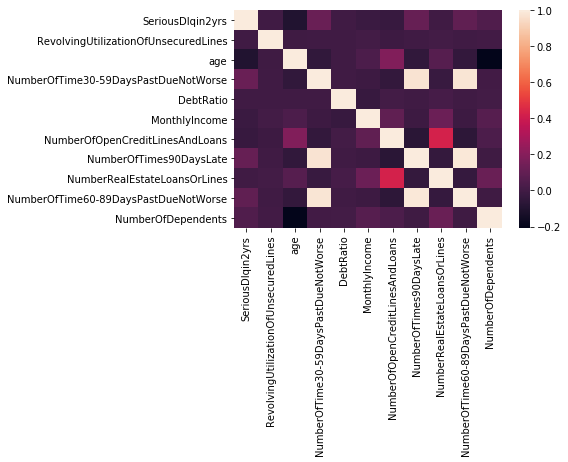

In [41]:
# Correlation Matrix
Corr_Matrix = df.corr()
round(Corr_Matrix, 2)
sns.heatmap(Corr_Matrix)

# Fisher LDA

In [15]:
mu = np.mean(X_train)
X_train_demeaned = (X_train - mu).T
X_test_demeaned = (X_test - mu).T
S_t = np.cov(X_train_demeaned)
S_w = np.zeros(S_t.shape)
for c in np.unique(y_train):
    S_w += np.cov(X_train_demeaned[:, y_train == c])

S_b = S_t - S_w

vals, vecs = linalg.eig(np.linalg.inv(S_w)@S_b)
vecs = vecs[:, np.argsort(vals)]

W_lda = vecs[:, -1:].real

X_train_lda = (W_lda.T@X_train_demeaned).T
X_test_lda = (W_lda.T@X_test_demeaned).T


print(np.mean(X_train_lda[y_train == 0]), np.mean(X_train_lda[y_train == 1]))
print(np.mean(X_test_lda[y_test == 0]), np.mean(X_test_lda[y_test == 1]))

[[-6.36609428e-06  2.90834787e-06 -2.26766084e-06 -3.18368413e-05
   2.97253014e-05 -1.27620433e-04 -3.58770762e-05 -2.39254404e-04
   4.67170349e-03  4.48178344e-01]
 [-4.13291945e-03 -4.48263174e-04 -2.41921264e-03  2.00174917e-03
  -2.78805048e-02 -1.14944319e-02  1.11965627e-01  4.57951138e-01
   3.07538080e-02  8.07527044e-02]
 [ 1.59531587e-01  6.78501197e-02 -7.51042566e-01 -7.21702375e-02
  -2.14604459e-02  2.54011878e-01  9.01873842e-03 -1.84809937e-01
   3.53821441e-02  4.91697314e-01]
 [ 2.71053865e-06 -6.56893185e-06 -4.17777753e-06  9.46051461e-05
  -9.18550319e-05 -3.01601786e-04  2.72768765e-02 -2.04865934e-03
  -1.07147921e-03  6.16147751e-04]
 [-2.82937326e-07 -1.27730350e-07 -2.71915061e-07 -9.40971906e-07
   2.52258781e-06  6.99107125e-07 -2.77120520e-06  1.70533808e-06
  -1.02082488e-03  5.56097847e-04]
 [-7.68351349e-04 -1.00700033e-03  1.96177860e-03 -1.52301268e-02
   7.34176614e-02 -4.45719712e-01 -2.12178010e-01 -2.22210910e-01
   1.37786506e-01 -1.74894515e-01

In [9]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
Clf = LogisticRegression(random_state = 0, max_iter = 1000).fit(X_train, y_train)
Probs = Clf.predict_proba(X_train)

Train_Predicted = np.zeros(len(Probs))
for i in range(len(Probs)):
    if (Probs[i, 0] > Probs[i, 1]):  
        Train_Predicted[i] = 0
    else:
        Train_Predicted[i] = 1

Equal = 0
for i in range(len(y_train)):
    if (y_train[i] == Train_Predicted[i]):
        Equal = Equal + 1      

Score = Probs[:, 1]/(1 - Probs[:, 1])
print("Scores Are:")
print(np.mean(Score[y_train == 0]), np.mean(Score[y_train == 1]))

Scores Are:
0.09199179721400955 0.3332044933838555


In [20]:
print("Classification Accuracy on Training Set is:")
print(Equal/len(y_train))

Classification Accuracy on Training Set is:
0.9315711094564408


In [21]:
Probs = Clf.predict_proba(X_test)
Test_Predicted = np.zeros(len(Probs))

for i in range(len(Probs)):
    if (Probs[i, 0] > Probs[i, 1]):  
        Test_Predicted[i] = 0
    else:
        Test_Predicted[i] = 1


Equal = 0
for i in range(len(y_test)):
    if (y_train[i] == Test_Predicted[i]):
        Equal = Equal + 1

In [23]:
print("Classification Accuracy on Test Set is:")
Equal/len(y_test)

Classification Accuracy on Test Setis:


0.9263523898309355

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
Clf = RandomForestClassifier(max_depth=5, random_state=0)
Clf.fit(X_train, y_train)
Probs = Clf.predict_proba(X_train)

Train_Predicted = np.zeros(len(Probs))
for i in range(len(Probs)):
    if (Probs[i, 0] > Probs[i, 1]):  
        Train_Predicted[i] = 0
    else:
        Train_Predicted[i] = 1

Equal = 0
for i in range(len(y_train)):
    if (y_train[i] == Train_Predicted[i]):
        Equal = Equal + 1      

Score = Probs[:, 1]/(1 - Probs[:, 1])
print("Scores Are:")
print(np.mean(Score[y_train == 0]), np.mean(Score[y_train == 1]))

Scores Are:
0.07023938518560487 0.39612069415283807


In [30]:
print("Classification Accuracy on Training Set is:")
print(Equal/len(y_train))

Classification Accuracy on Training Set is:
0.9345619260362373


In [31]:
Probs = Clf.predict_proba(X_test)

Test_Predicted = np.zeros(len(Probs))

for i in range(len(Probs)):
    if (Probs[i, 0] > Probs[i, 1]):  
        Test_Predicted[i] = 0
    else:
        Test_Predicted[i] = 1

Equal = 0
for i in range(len(y_test)):
    if (y_train[i] == Test_Predicted[i]):
        Equal = Equal + 1

Score = Probs[:, 1]/(1 - Probs[:, 1])
print("Scores Are:")
print(np.mean(Score[y_test == 0]), np.mean(Score[y_test == 1]))

Scores Are:
0.07135186453471327 0.3791356430665598


In [32]:
print("Classification Accuracy on Test Set is:")
Equal/len(y_test)

Classification Accuracy on Test Set is:


0.921665952782887

In [29]:
X_train.shape

(115296, 10)

In [78]:
np.sum(y_train)

75006

In [80]:
y_train.shape

(150011,)

In [163]:
default = []
for i in range(len(X_train)):
    if(y_train[i] == 1):
        default.append(X_train[i])
default = np.asarray(default)
        
resampled = []
resampled_y = []
target = X_train.shape[0]/2
current = np.sum(y_train)

while(current <= target):
    index = np.random.choice(default.shape[0], 1)  
    resampled.append(default[index].squeeze())
    resampled_y.append(1)
    current += 1
    target += .498
    
X_train = np.concatenate((X_train, np.asarray(resampled)))
y_train = np.concatenate((y_train, np.asarray(resampled_y)))

# Dense NN

In [207]:
#class_weight = {1: 0.95,0: 0.05}

model_in = keras.Input(shape = (10,))
x = layers.Dense(10, activation= "relu")(model_in)
x2 = layers.Dense(10, activation= "relu")(x)
x3 = layers.Dense(10, activation= "relu")(x2)
x4 = layers.Dense(10, activation= "relu")(x3)

out = layers.Dense(1, activation= "sigmoid")(x4)

model = keras.Model(model_in, out)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_train, y_train, epochs=100,
                batch_size=128,
                shuffle=True)

Epoch 1/100
1170/1170 [==============================] - 2s 1ms/step - loss: 3.6246
Epoch 2/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.7017
Epoch 3/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.6768
Epoch 4/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.6871
Epoch 5/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.7100
Epoch 6/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.6830
Epoch 7/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.6836
Epoch 8/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.6724
Epoch 9/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.6803
Epoch 10/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.6353
Epoch 11/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.5888
Epoch 12/100
1170/1170 [==============================] - 1s 1ms/step - lo

1170/1170 [==============================] - 1s 1ms/step - loss: 0.5104
Epoch 98/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.5023
Epoch 99/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.5081
Epoch 100/100
1170/1170 [==============================] - 1s 1ms/step - loss: 0.5042


In [208]:
Probs = model.predict(X_train)
Probs

array([[0.2691541 ],
       [0.27822167],
       [0.27822167],
       ...,
       [0.83549863],
       [0.43416348],
       [0.92692226]], dtype=float32)

In [209]:
Probs.shape

(149734, 1)

In [210]:
Train_Predicted = np.zeros(len(Probs))
for i in range(len(Probs)):
    if (Probs[i] < .5):  
        Train_Predicted[i] = 0
    else:
        Train_Predicted[i] = 1

Equal = 0
default = 0
non_default = 0
for i in range(len(y_train)):
    if(y_train[i] == 1):
        if(y_train[i] == Train_Predicted[i]):
            Equal += 1
            default += 1
    else:
        if(y_train[i] == Train_Predicted[i]):
            Equal += 1
            non_default += 1
        
Probs

Score = Probs/(1 - Probs)
print(np.mean(Score[y_train == 0]), np.mean(Score[y_train == 1]))

1.0631742 4.871376


In [211]:
np.sum(Train_Predicted)

68350.0

In [212]:
print("Classification Accuracy on Training Set is:")
print(Equal/len(y_train))
print("Classification Accuracy on Non-Default Training Set is:")
print(non_default/(len(y_train) - np.sum(y_train)))
print("Classification Accuracy on Default Training Set is:")
print(default/np.sum(y_train))

Classification Accuracy on Training Set is:
0.7652036277665727
Classification Accuracy on Non-Default Training Set is:
0.8081594560362643
Classification Accuracy on Default Training Set is:
0.7220891487909646
